In [17]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt

In [18]:
import nltk
import re
import string
from sklearn.model_selection import train_test_split
import seaborn as sns
import os

In [ ]:
# ఈ,కలిగి,ఉండి,ఇది,గల,ఉన్నాయి

In [19]:
data=pd.read_csv("shuffled_language_data.csv")
print(data.head(6))
df=data

                                                text language
0  భారతదేశం 142 కోట్లకు పైగా జనాభాతో ప్రపంచంలో మొ...   Telugu
1  భారతదేశం 142 కోట్లకు పైగా జనాభాతో ప్రపంచంలో మొ...   Telugu
2  ಭಾರತ, ಅಧಿಕೃತವಾಗಿ ಭಾರತ ಗಣರಾಜ್ಯ, ಅಥವಾ ಇಂಡಿಯಾ (In...  Kannada
3  ಭಾರತ, ಅಧಿಕೃತವಾಗಿ ಭಾರತ ಗಣರಾಜ್ಯ, ಅಥವಾ ಇಂಡಿಯಾ (In...  Kannada
4  भारत (आधिकारिक नाम: भारत गणराज्य, अंग्रेज़ी: R...    Hindi
5  ಭಾರತ, ಅಧಿಕೃತವಾಗಿ ಭಾರತ ಗಣರಾಜ್ಯ, ಅಥವಾ ಇಂಡಿಯಾ (In...  Kannada


In [20]:
print(df.shape)

(229, 2)


In [21]:
import re
import pandas as pd
import unicodedata

# Define custom stopwords for Telugu, Hindi, and Kannada
telugu_stopwords = {"ఈ", "కలిగి", "ఉండి", "ఇది", "గల", "ఉన్నాయి"}
hindi_stopwords = {"है", "का", "की", "और", "में", "के", "से", "को", "हैं", "यह", "साथ"}
kannada_stopwords = {"ಆಗ", "ಹಿಂದೆ", "ಮತ್ತು", "ಇದು", "ಅವರು", "ಒಂದು"}

# Preprocess the text
def preprocess_text(text, language):
    # Unicode normalization to handle inconsistencies
    text = unicodedata.normalize('NFKC', text)
    
    
    text = re.sub(r'\d+', '', text)  # Remove numbers
    # Remove punctuation while keeping script characters
    text = re.sub(r'[^\w\s\u0900-\u097F\u0C00-\u0C7F\u0C80-\u0CFF]', '', text)  
    
    # Convert text to lowercase
    text = text.lower()
    
    # Assign stopwords based on language
    stopwords_set = {
        "Telugu": telugu_stopwords,
        "Hindi": hindi_stopwords,
        "Kannada": kannada_stopwords
    }.get(language, set())

    # Tokenization & Stopword Removal
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords_set]

    # Reconstruct cleaned text
    return " ".join(filtered_words)

# Apply preprocessing to each row
df["preprocessed_text"] = df.apply(lambda row: preprocess_text(row["text"], row["language"]), axis=1)

# Display the preprocessed text
print(df[["language", "preprocessed_text"]])


    language                                  preprocessed_text
0     Telugu  భారతదేశం కోట్లకు పైగా జనాభాతో ప్రపంచంలో మొదటి ...
1     Telugu  భారతదేశం కోట్లకు పైగా జనాభాతో ప్రపంచంలో మొదటి ...
2    Kannada  ಭಾರತ ಅಧಿಕೃತವಾಗಿ ಭಾರತ ಗಣರಾಜ್ಯ ಅಥವಾ ಇಂಡಿಯಾ india...
3    Kannada  ಭಾರತ ಅಧಿಕೃತವಾಗಿ ಭಾರತ ಗಣರಾಜ್ಯ ಅಥವಾ ಇಂಡಿಯಾ india...
4      Hindi  भारत आधिकारिक नाम भारत गणराज्य अंग्रेज़ी repub...
..       ...                                                ...
224    Hindi  भारत आधिकारिक नाम भारत गणराज्य अंग्रेज़ी repub...
225  Kannada  ಭಾರತ ಅಧಿಕೃತವಾಗಿ ಭಾರತ ಗಣರಾಜ್ಯ ಅಥವಾ ಇಂಡಿಯಾ india...
226  Kannada  ಭಾರತ ಅಧಿಕೃತವಾಗಿ ಭಾರತ ಗಣರಾಜ್ಯ ಅಥವಾ ಇಂಡಿಯಾ india...
227   Telugu  భారతదేశం కోట్లకు పైగా జనాభాతో ప్రపంచంలో మొదటి ...
228   Telugu  భారతదేశం కోట్లకు పైగా జనాభాతో ప్రపంచంలో మొదటి ...

[229 rows x 2 columns]


C:\Users\lsrin\AppData\Local\Temp\ipykernel_10708\2669606780.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")


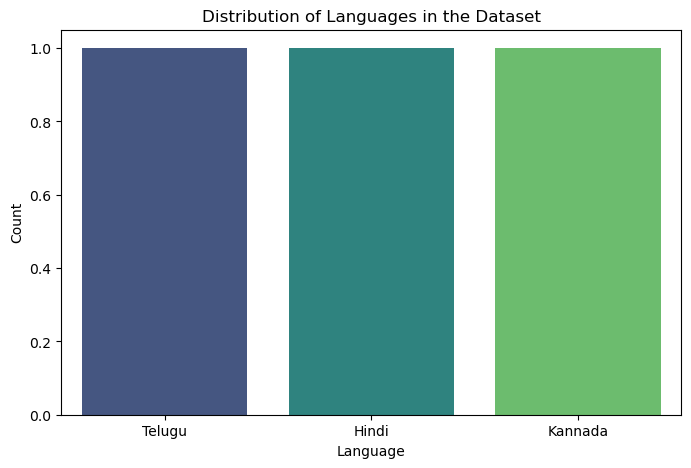

language
Telugu     1
Hindi      1
Kannada    1
Name: count, dtype: int64


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each language
language_counts = df["language"].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.xlabel("Language")
plt.ylabel("Count")
plt.title("Distribution of Languages in the Dataset")
plt.show()

# Print language distribution counts
print(language_counts)


In [49]:
from collections import Counter


# Function to count word frequencies
def get_word_frequencies(text):
    words = text.split()
    return Counter(words)

# Function to calculate sentence lengths (assuming sentences end with a full stop)
def get_sentence_lengths(text):
    sentences = text.split("।") if "।" in text else text.split(".")  # Adjust for Hindi punctuation
    return [len(sentence.split()) for sentence in sentences if sentence.strip()]

# Initialize storage for statistics
stats = {
    "language": [],
    "total_words": [],
    "avg_sentence_length": [],
    "most_common_words": []
}

# Process each row
for index, row in df.iterrows():
    text = row["preprocessed_text"]
    language = row["language"]

    # Word frequencies
    word_freq = get_word_frequencies(text)
    most_common_words = word_freq.most_common(5)  # Top 5 words

    # Sentence lengths
    sentence_lengths = get_sentence_lengths(text)
    avg_sentence_length = np.mean(sentence_lengths) if sentence_lengths else 0

    # Store results
    stats["language"].append(language)
    stats["total_words"].append(len(text.split()))
    stats["avg_sentence_length"].append(avg_sentence_length)
    stats["most_common_words"].append(most_common_words)

# Convert to DataFrame
stats_df = pd.DataFrame(stats)

# Display statistics
print(stats_df)

  language  total_words  avg_sentence_length  \
0   Telugu           42                 42.0   
1    Hindi           31                 15.5   
2  Kannada           30                 30.0   

                                   most_common_words  
0  [(ఉన్న, 3), (దేశం, 2), (ఒక, 2), (సామర్థ్యం, 2)...  
1  [(भारत, 3), (सबसे, 2), (बड़ा, 2), (देश, 2), (ह...  
2  [(ಅತಿ, 3), (ಭಾರತ, 2), (ದೊಡ್ಡ, 2), (ಪ್ರಪಂಚದ, 2)...  


Feature Extraction

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Character n-grams (Example: n = 3 for trigrams)
char_vectorizer = CountVectorizer(analyzer='char', ngram_range=(3, 5))  # Trigrams to 5-grams
char_features = char_vectorizer.fit_transform(df["preprocessed_text"])

# Word n-grams (Example: n = 2 for bigrams)
word_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2))  # Unigrams & bigrams
word_features = word_vectorizer.fit_transform(df["preprocessed_text"])

# TF-IDF Vectorizer (Unigrams & Bigrams)
tfidf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 2))
tfidf_features = tfidf_vectorizer.fit_transform(df["preprocessed_text"])

# Display Feature Shapes
print("Character n-grams Shape:", char_features.shape)
print("Word n-grams Shape:", word_features.shape)
print("TF-IDF Shape:", tfidf_features.shape)


Character n-grams Shape: (3, 1877)
Word n-grams Shape: (3, 141)
TF-IDF Shape: (3, 141)


word embeddings, we will use word2vec

In [41]:
pip install gensim


In [39]:
pip install --upgrade scipy gensim

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 217.9 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 327.7 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 360.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/24.0 MB 5.8 MB/s eta 0:00:05
    --------------------------------------- 0.5/24.0 MB 5.8 MB/s eta 0:00:05
   - -------------------------------------- 0.8/24.0 MB 6.6 MB/s eta 0:00:04
   - -------------------------------------- 1.0/24.0 MB 7.0 MB/s eta 0:00:04
   -- ------------------------------------- 1.2/24.0 MB 5.5 MB/s eta 0:00:05
   -- ------------------------------------- 1.5/24.0 MB 5.9 MB/s eta 0:00:04
   --- ------------------------------------ 1.8/24.0 MB 5.9 MB/s eta 0:00:04
   ---

In [37]:
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize text for Word2Vec
df["tokenized_text"] = df["preprocessed_text"].apply(word_tokenize)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df["tokenized_text"], vector_size=100, window=5, min_count=1, workers=4)

# Check most similar words to "భారతదేశం" (example for Telugu)
if "భారతదేశం" in word2vec_model.wv:
    print(word2vec_model.wv.most_similar("భారతదేశం"))


ImportError: cannot import name 'triu' from 'scipy.linalg' (c:\Users\lsrin\anaconda3\Lib\site-packages\scipy\linalg\__init__.py)

In [ ]:
# Consider Unicode patterns, as some languages share scripts (e.g., Hindi and Marathi in
# # Devanagari).

In [51]:

# Define Unicode ranges for scripts
unicode_scripts = {
    "Devanagari": r"[\u0900-\u097F]",  # Hindi, Marathi, Nepali
    "Telugu": r"[\u0C00-\u0C7F]",      # Telugu
    "Kannada": r"[\u0C80-\u0CFF]",     # Kannada
}

# Function to detect script
def detect_script(text):
    for script, pattern in unicode_scripts.items():
        if re.search(pattern, text):
            return script
    return "Unknown"

# Apply script detection to the dataset
df["detected_script"] = df["preprocessed_text"].apply(detect_script)

# Show results
print(df[["preprocessed_text", "detected_script"]])


                                   preprocessed_text detected_script
0  భారతదేశం కోట్లకు పైగా జనాభాతో ప్రపంచంలో మొదటి ...          Telugu
1  भारत आधिकारिक नाम भारत गणराज्य अंग्रेज़ी repub...      Devanagari
2  ಭಾರತ ಅಧಿಕೃತವಾಗಿ ಭಾರತ ಗಣರಾಜ್ಯ ಅಥವಾ ಇಂಡಿಯಾ india...         Kannada


<!-- Step 2: Implementing Traditional ML Model (Logistic Regression) -->

In [22]:
# Display the preprocessed text
print(df[["language", "preprocessed_text"]])

    language                                  preprocessed_text
0     Telugu  భారతదేశం కోట్లకు పైగా జనాభాతో ప్రపంచంలో మొదటి ...
1     Telugu  భారతదేశం కోట్లకు పైగా జనాభాతో ప్రపంచంలో మొదటి ...
2    Kannada  ಭಾರತ ಅಧಿಕೃತವಾಗಿ ಭಾರತ ಗಣರಾಜ್ಯ ಅಥವಾ ಇಂಡಿಯಾ india...
3    Kannada  ಭಾರತ ಅಧಿಕೃತವಾಗಿ ಭಾರತ ಗಣರಾಜ್ಯ ಅಥವಾ ಇಂಡಿಯಾ india...
4      Hindi  भारत आधिकारिक नाम भारत गणराज्य अंग्रेज़ी repub...
..       ...                                                ...
224    Hindi  भारत आधिकारिक नाम भारत गणराज्य अंग्रेज़ी repub...
225  Kannada  ಭಾರತ ಅಧಿಕೃತವಾಗಿ ಭಾರತ ಗಣರಾಜ್ಯ ಅಥವಾ ಇಂಡಿಯಾ india...
226  Kannada  ಭಾರತ ಅಧಿಕೃತವಾಗಿ ಭಾರತ ಗಣರಾಜ್ಯ ಅಥವಾ ಇಂಡಿಯಾ india...
227   Telugu  భారతదేశం కోట్లకు పైగా జనాభాతో ప్రపంచంలో మొదటి ...
228   Telugu  భారతదేశం కోట్లకు పైగా జనాభాతో ప్రపంచంలో మొదటి ...

[229 rows x 2 columns]


c:\Users\lsrin\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:555: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn(


Logistic Regression Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      Telugu       1.00      1.00      1.00        17
       Hindi       1.00      1.00      1.00        15
     Kannada       1.00      1.00      1.00        14

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



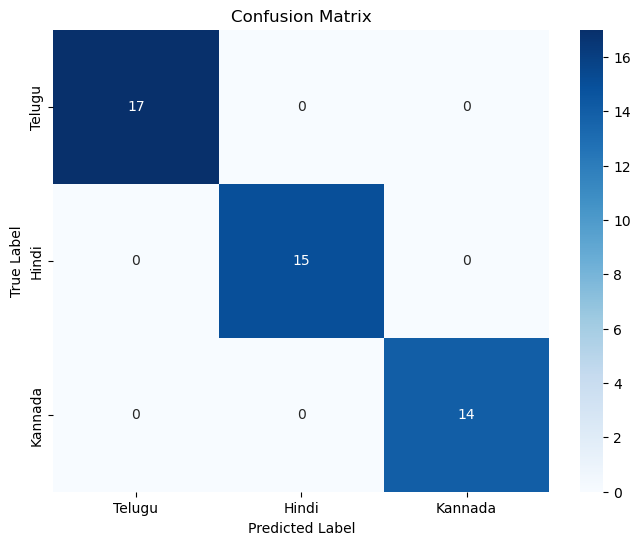


Testing with example texts:
Text: నమస్కారం ఎలా ఉన్నారు
Predicted Language: Telugu

Text: नमस्ते कैसे हो
Predicted Language: Hindi

Text: ನಮಸ್ಕಾರ ಹೇಗಿದ್ದೀರಿ
Predicted Language: Kannada



In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# First, encode the labels
le = LabelEncoder()
y = le.fit_transform(df["language"])

# Improved TF-IDF vectorization specifically for Indian languages
vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),     # Using 1-3 character n-grams
    analyzer='char',        # Character level is better for these scripts
    max_features=10000,     # Increased features for better script capture
    sublinear_tf=True,      # Apply sublinear scaling
    # Unicode ranges for Telugu, Hindi, and Kannada
    token_pattern=r'[^\s]+' # Capture all non-whitespace characters
)
X = vectorizer.fit_transform(df["preprocessed_text"])

# Split dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Logistic Regression with improved parameters
lr_model = LogisticRegression(
    max_iter=2000,          # Increased iterations
    C=0.1,                  # Stronger regularization
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42
)
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Print results
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Telugu", "Hindi", "Kannada"]))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Telugu", "Hindi", "Kannada"],
            yticklabels=["Telugu", "Hindi", "Kannada"])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Test the model with some example text
def predict_language(text):
    # Preprocess the text using your existing preprocess_text function
    processed_text = preprocess_text(text, "Unknown")
    # Transform the text using the vectorizer
    text_features = vectorizer.transform([processed_text])
    # Predict
    prediction = lr_model.predict(text_features)
    return le.inverse_transform(prediction)[0]

# Example usage:
example_texts = [
    "నమస్కారం ఎలా ఉన్నారు",  # Telugu
    "नमस्ते कैसे हो",          # Hindi
    "ನಮಸ್ಕಾರ ಹೇಗಿದ್ದೀರಿ"      # Kannada
]

print("\nTesting with example texts:")
for text in example_texts:
    print(f"Text: {text}")
    print(f"Predicted Language: {predict_language(text)}\n")